In [1]:
from sklearn.cluster import KMeans

from itertools import cycle, islice

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
k_means = KMeans(n_clusters=8,  #количество кластеров
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300 #максимальное количество итераций
                )

In [3]:
plt.rcParams['figure.figsize'] = 12, 8

In [4]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

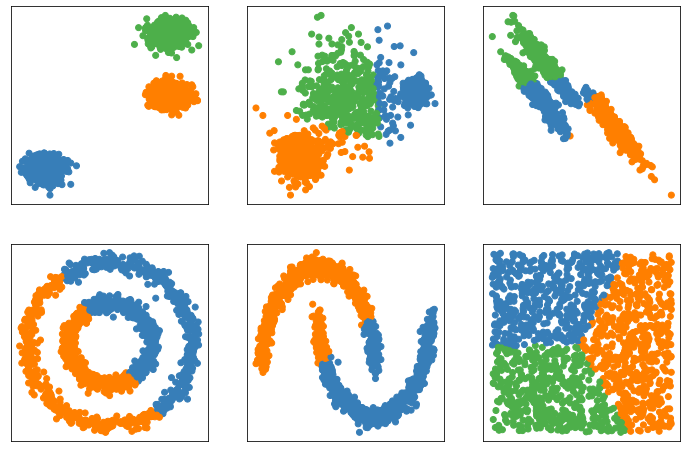

In [5]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма - количества кластеров
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [6]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

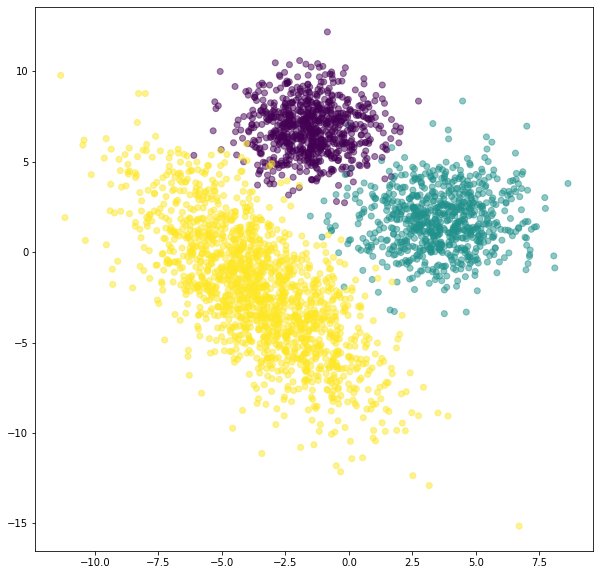

In [7]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [8]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [9]:
k_means = KMeans()

In [10]:
k_means.fit(X)

KMeans()

In [11]:
k_means.cluster_centers_

array([[-1.90833635,  7.75425289],
       [-0.44569724, -7.31605189],
       [ 2.62862205,  0.71845893],
       [-4.51122415, -0.78499539],
       [-0.82952872,  5.52727328],
       [-2.54661563, -3.81495561],
       [-6.45859761,  3.04470729],
       [ 4.71837969,  2.61799646]])

In [12]:
k_means.labels_

array([7, 2, 0, ..., 3, 3, 1])

In [13]:
k_means = KMeans(n_clusters=3, random_state=42)

In [14]:
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [15]:
k_means.cluster_centers_

array([[-3.18494242, -2.909118  ],
       [-2.38267054,  6.21386031],
       [ 3.65090178,  1.74134602]])

In [16]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [17]:
len(k_means.labels_)

3000

In [18]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1321 938 741 

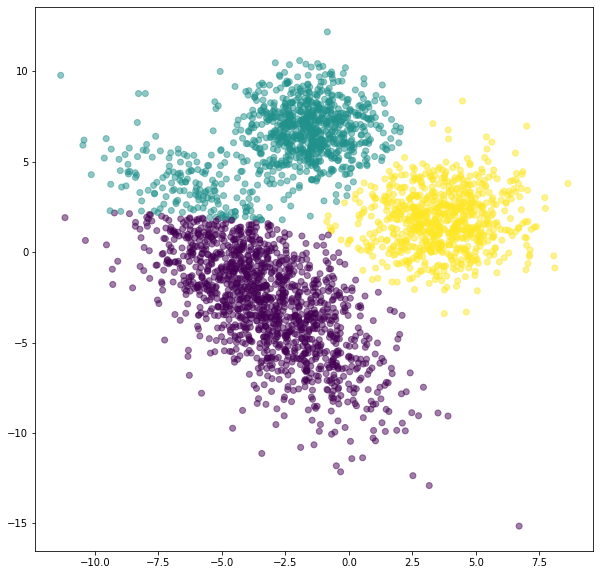

In [19]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [20]:
k_means.labels_

array([2, 2, 1, ..., 0, 0, 0])

In [21]:
pd.Series(k_means.labels_).value_counts()

0    1321
1     938
2     741
dtype: int64

In [22]:
df = pd.read_csv('module7_snsdata.csv')

In [23]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.isna().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

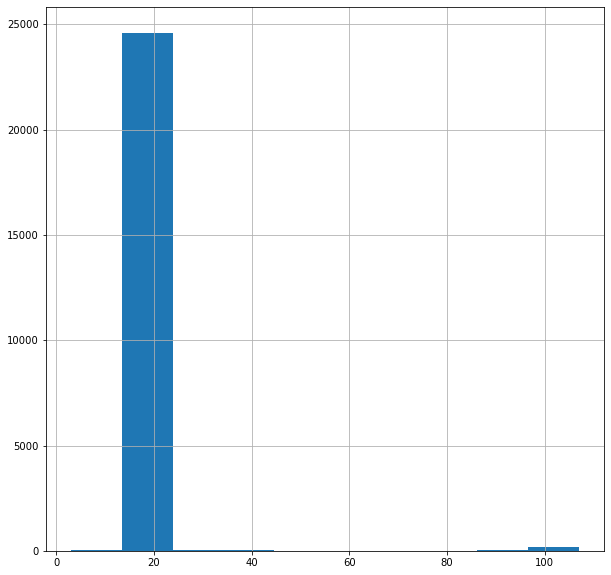

In [25]:
df.age.hist()

In [26]:
df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1, inplace=True)

In [27]:
ss = StandardScaler()

In [28]:
ss.fit(df)

StandardScaler()

In [29]:
X = ss.transform(df)

In [30]:
k_means = KMeans(n_clusters=9, random_state=123)

In [31]:
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

In [32]:
pd.Series(k_means.labels_).value_counts().sort_index()

0    20345
1      424
2      830
3        1
4     1026
5      932
6      644
7     5034
8      764
dtype: int64

In [33]:
pd.Series(k_means.labels_).value_counts().sort_values()

3        1
1      424
6      644
8      764
2      830
5      932
4     1026
7     5034
0    20345
dtype: int64

In [34]:
k_means.labels_

array([0, 7, 0, ..., 0, 0, 0])

In [35]:
df

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.iloc[0][df.iloc[0]==1].index

Index(['dance'], dtype='object')

In [37]:
df[0:10][df==1].dropna(axis=1, how='all').columns

Index(['football', 'softball', 'cute', 'sex', 'sexy', 'hot', 'dance', 'band',
       'marching', 'music', 'rock', 'god', 'hair', 'dress', 'mall', 'shopping',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [38]:
for i in range(len(np.unique(k_means.labels_))):
    print(i, df[k_means.labels_==i][df==1].dropna(axis=1, how='all').columns)

0 Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')
1 Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')
2 Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'c

In [39]:
df[k_means.labels_==5][df==1].dropna(axis=1, how='all').isna().sum()

basketball      781
football        747
soccer          854
softball        853
volleyball      869
swimming        804
cheerleading    859
baseball        823
tennis          855
sports          698
cute            733
sex             772
sexy            767
hot             834
kissed          734
dance           729
band            685
marching        897
music           712
rock            722
god             695
church          783
jesus           849
bible           912
hair            769
dress           789
blonde          754
mall            662
shopping        711
clothes         700
hollister       860
abercrombie     851
die             584
death           741
drunk           628
drugs           640
dtype: int64

In [40]:
df[k_means.labels_==5][df==1].dropna(axis=1, how='all')

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29877,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29891,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29914,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29915,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df2 = df[['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']]

In [51]:
df2[df2!=0].dropna(axis=0)

,music,god,dance,hair,shopping,cute,band,rock,football,church
888,22.0,3.0,2.0,10.0,1.0,2.0,6.0,5.0,1.0,1.0
9911,12.0,4.0,12.0,27.0,8.0,8.0,7.0,2.0,11.0,5.0
12580,6.0,5.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
13192,6.0,1.0,1.0,13.0,3.0,4.0,1.0,1.0,1.0,1.0
15015,4.0,5.0,2.0,21.0,1.0,3.0,2.0,5.0,2.0,2.0
24365,16.0,2.0,4.0,37.0,2.0,4.0,5.0,3.0,3.0,1.0
25882,3.0,2.0,1.0,7.0,1.0,1.0,3.0,1.0,1.0,1.0
29583,10.0,1.0,3.0,11.0,1.0,9.0,3.0,6.0,3.0,1.0


In [61]:
k_means.labels_[df2[df2!=0].dropna(axis=0).index]

array([5, 5, 5, 5, 5, 5, 5, 5])

In [64]:
k_means.labels_[9911]

5